### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score, precision_score, classification_report

import glob
import os

In [2]:
closed_questions_df = pd.read_csv('./closed_questions.csv', index_col = 0)

In [3]:
closed_questions_df.head()

,Id,Title,Body,Tags,CreationDate,ClosedDate,Comment
0,196788,How do I get character offset information from...,<p>I'm trying to implement search result highl...,<search><pdf>,2008-10-13 05:32:11,2017-03-15 14:33:44,102
1,196791,How do I set up my Ubuntu VPS to send outgoing...,<p>My VPS provider (Slicehost) doesn't provide...,<email><ubuntu><smtp><postfix-mta><mta>,2008-10-13 05:37:11,2018-08-31 07:08:50,102
2,196820,Cross-platform editor control,<p>I need a cross-platform editor control to u...,<c><user-interface><editor><cross-platform>,2008-10-13 06:02:46,2013-12-26 16:14:50,102
3,196828,ReSharper (or something like it) for Visual C++?,<p>I've seen ReSharper recommended a lot Unfo...,<visual-studio><visual-c++><resharper>,2008-10-13 06:09:24,2013-01-08 02:07:44,3
4,196876,Is there a better way to get a named series of...,<p>Just looking at ways of getting named const...,<python>,2008-10-13 06:43:47,2013-03-28 00:29:47,1


In [4]:
closed_questions_df.describe()

,Id,Comment
count,2.075270e+05,207527.000000
mean,9.619349e+06,32.796981
std,4.939068e+06,45.681214
min,1.700000e+01,1.000000
25%,5.524152e+06,1.000000
50%,1.048485e+07,4.000000
75%,1.394662e+07,101.000000
max,1.682580e+07,105.000000


In [5]:
closed_questions_df["Tags"] = closed_questions_df["Tags"].str.replace('><', ' ')
closed_questions_df["Tags"] = closed_questions_df["Tags"].str.replace('<', '')
closed_questions_df["Tags"] = closed_questions_df["Tags"].str.replace('>', '')

In [6]:
closed_questions_df.head()

,Id,Title,Body,Tags,CreationDate,ClosedDate,Comment
0,196788,How do I get character offset information from...,<p>I'm trying to implement search result highl...,search pdf,2008-10-13 05:32:11,2017-03-15 14:33:44,102
1,196791,How do I set up my Ubuntu VPS to send outgoing...,<p>My VPS provider (Slicehost) doesn't provide...,email ubuntu smtp postfix-mta mta,2008-10-13 05:37:11,2018-08-31 07:08:50,102
2,196820,Cross-platform editor control,<p>I need a cross-platform editor control to u...,c user-interface editor cross-platform,2008-10-13 06:02:46,2013-12-26 16:14:50,102
3,196828,ReSharper (or something like it) for Visual C++?,<p>I've seen ReSharper recommended a lot Unfo...,visual-studio visual-c++ resharper,2008-10-13 06:09:24,2013-01-08 02:07:44,3
4,196876,Is there a better way to get a named series of...,<p>Just looking at ways of getting named const...,python,2008-10-13 06:43:47,2013-03-28 00:29:47,1


In [7]:
print(closed_questions_df["Comment"].unique())
counts = closed_questions_df['Comment'].value_counts()
print(counts)

[102   3   1 105 101   2 104   7   4 103]
1      55749
4      36065
101    22673
102    22379
3      21742
2      15815
7      15567
105     7277
104     6929
103     3331
Name: Comment, dtype: int64


In [8]:
# Old reasons
# 1 = Exact Duplicate
# 2 = Off-topic
# 3 = Subjective and argumentative
# 4 = Not a real question
# 7 = Too localized

# New reasons
# 1 - duplicate
# 2 - off topic
# 3 - unclear
# 4 - too broad
# 5 - opinion

# 3 - 'opinion',
# 4 - 'too broad',
# 7 - 'unclear',

reason_mapping = {
    3: 105,
    4: 104,
    7: 103,
}

closed_questions_df['Comment'] = closed_questions_df['Comment'].replace(reason_mapping)
print(closed_questions_df["Comment"].unique())

[102 105   1 101   2 104 103]


In [9]:
reason_mapping = {
    101: 1,
    102: 2,
    103: 3,
    104: 4,
    105: 5,
}

closed_questions_df['Comment'] = closed_questions_df['Comment'].replace(reason_mapping)
print(closed_questions_df["Comment"].unique())

[2 5 1 4 3]


### Distribution of Closed Reasons

Duplicate    78422
Too broad    42994
Off-topic    38194
Opinion      29019
Unclear      18898
Name: Comment, dtype: int64


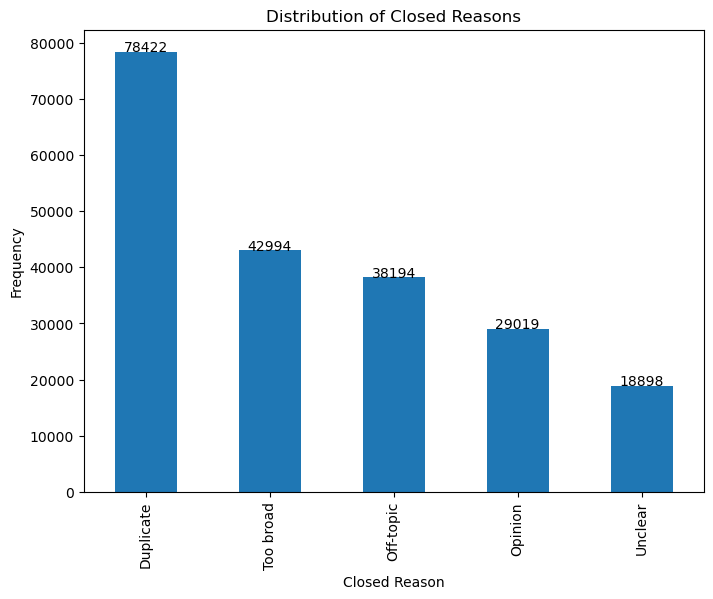

In [10]:
reason_mapping = {
    1: 'Duplicate',
    2: 'Off-topic',
    3: 'Unclear',
    4: 'Too broad',
    5: 'Opinion'
}

# Create a bar chart to visualize the Comment column
plt.figure(figsize=(8, 6))
counts = closed_questions_df['Comment'].replace(reason_mapping).value_counts()
print(counts)
bar_plot = counts.plot(kind='bar')
plt.title('Distribution of Closed Reasons')
plt.xlabel('Closed Reason')
plt.ylabel('Frequency')

# Set the x-labels to display the new labels
plt.xticks(range(len(counts.index)), counts.index)

# Add the value of each bar above it
for i, v in enumerate(counts.values):
    bar_plot.text(i, v+5, str(v), ha='center', fontsize=10)

plt.show()

In [11]:
open_questions_df = pd.read_csv('./open_questions.csv', index_col = 0)
open_questions_df["Comment"] = 0
open_questions_df["Tags"] = open_questions_df["Tags"].str.replace('><', ' ')
open_questions_df["Tags"] = open_questions_df["Tags"].str.replace('<', '')
open_questions_df["Tags"] = open_questions_df["Tags"].str.replace('>', '')

In [12]:
open_questions_df.head()

,Id,Title,Body,Tags,CreationDate,ClosedDate,Comment
0,4,How to convert Decimal to Double in C#?,<p>I want to assign the decimal variable &quot...,c# floating-point type-conversion double decimal,2008-07-31 21:42:52,NaN,0
1,6,Why did the width collapse in the percentage w...,<p>I have an absolutely positioned <code>div</...,html css internet-explorer-7,2008-07-31 22:08:08,NaN,0
2,9,How do I calculate someone's age based on a Da...,<p>Given a <code>DateTime</code> representing ...,c# .net datetime,2008-07-31 23:40:59,NaN,0
3,11,Calculate relative time in C#,<p>Given a specific <code>DateTime</code> valu...,c# datetime time datediff relative-time-span,2008-07-31 23:55:37,NaN,0
4,13,Determine a user's timezone,<p>Is there a standard way for a web server to...,html browser timezone user-agent timezone-offset,2008-08-01 00:42:38,NaN,0


In [13]:
open_questions_df.describe()

,Id,ClosedDate,Comment
count,2.070000e+05,0.0,207000.0
mean,6.769989e+05,NaN,0.0
std,3.359025e+05,NaN,0.0
min,4.000000e+00,NaN,0.0
25%,3.989518e+05,NaN,0.0
50%,7.038195e+05,NaN,0.0
75%,9.661568e+05,NaN,0.0
max,1.215590e+06,NaN,0.0


In [14]:
closed_questions_df.head()

,Id,Title,Body,Tags,CreationDate,ClosedDate,Comment
0,196788,How do I get character offset information from...,<p>I'm trying to implement search result highl...,search pdf,2008-10-13 05:32:11,2017-03-15 14:33:44,2
1,196791,How do I set up my Ubuntu VPS to send outgoing...,<p>My VPS provider (Slicehost) doesn't provide...,email ubuntu smtp postfix-mta mta,2008-10-13 05:37:11,2018-08-31 07:08:50,2
2,196820,Cross-platform editor control,<p>I need a cross-platform editor control to u...,c user-interface editor cross-platform,2008-10-13 06:02:46,2013-12-26 16:14:50,2
3,196828,ReSharper (or something like it) for Visual C++?,<p>I've seen ReSharper recommended a lot Unfo...,visual-studio visual-c++ resharper,2008-10-13 06:09:24,2013-01-08 02:07:44,5
4,196876,Is there a better way to get a named series of...,<p>Just looking at ways of getting named const...,python,2008-10-13 06:43:47,2013-03-28 00:29:47,1


In [15]:
questions_df = pd.concat([open_questions_df, closed_questions_df], axis=0).sample(frac=1)

In [16]:
questions_df.head()

,Id,Title,Body,Tags,CreationDate,ClosedDate,Comment
84603,602706,Batch renaming files with Bash,<p>How can Bash rename a series of packages to...,bash shell file-rename,2009-03-02 15:20:44,NaN,0
104418,11299031,What is a common naming convention for RAII cl...,"<p>In C++, when using the Resource Acquisition...",c++ naming-conventions raii,2012-07-02 18:18:36,2012-07-03 02:21:44,5
81691,586257,Read pdf uploadstream one page at a time with ...,<p>I am trying to read a pdf document in a j2e...,java pdf inputstream pdfbox,2009-02-25 14:49:08,NaN,0
49163,380568,Eager loading of lazy loaded entities in nHibe...,<p>I'm working on a project that has a rich ob...,nhibernate activerecord lazy-loading castle-ac...,2008-12-19 10:05:30,NaN,0
113347,755830,capturing webform event for workflow on asp.ne...,<p>The basic idea is that I have a website and...,asp.net events workflow-foundation,2009-04-16 12:04:44,NaN,0


In [17]:
questions_df.describe()

,Id,Comment
count,4.145270e+05,414527.000000
mean,5.153859e+06,1.275128
std,5.679827e+06,1.658830
min,4.000000e+00,0.000000
25%,6.630365e+05,0.000000
50%,1.157192e+06,1.000000
75%,1.049927e+07,2.000000
max,1.682580e+07,5.000000


### Exclude the duplicate questions

In [18]:
# Filter out the Duplicate rows
questions_df = questions_df[questions_df['Comment'] != 1]

In [19]:
# Define the input and output variables
X = questions_df[['Title', 'Body', 'Tags']]
y_binary = questions_df['Comment'].apply(lambda x: 0 if x == 0 else 1)

# Split the data into training and test sets
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Vectorize the input features
vectorizer = TfidfVectorizer()
X_b_train_vect = vectorizer.fit_transform(X_b_train.apply(lambda x: ' '.join(x), axis=1))
X_b_test_vect = vectorizer.transform(X_b_test.apply(lambda x: ' '.join(x), axis=1))

# Train the binary classifier
# Uncomment these models one-by-one to see their performance as training all of them together takes a lot of time

# Logistic regression model
clf_binary = LogisticRegression(max_iter=10000)

# SVC model
# clf_binary = SVC(kernel='rbf', C=10, gamma=1, cache_size=2000)

# RandomForestClassifier model
# clf_binary = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=0)

# KNeighborsClassifier model
# clf_binary = KNeighborsClassifier(n_neighbors=2)

clf_binary.fit(X_b_train_vect, y_b_train)

# Evaluate the binary classifier
y_pred_binary = clf_binary.predict(X_b_test_vect)
acc_binary = accuracy_score(y_b_test, y_pred_binary)
print(f"Binary classification accuracy: {acc_binary}")
print(classification_report(y_b_test, y_pred_binary))

Binary classification accuracy: 0.8057601047291769
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     41393
           1       0.78      0.68      0.73     25828

    accuracy                           0.81     67221
   macro avg       0.80      0.78      0.79     67221
weighted avg       0.80      0.81      0.80     67221



### Script to predict whether the question will be closed or not

In [20]:
# Define the input test case
title = "How to improve my coding skills?"
body = "I am a beginner in programming and want to improve my skills. Can you suggest some ways to do so?"
tags = "programming beginners skills improvement"

# Vectorize the input features using the trained vectorizer
test_case_vect = vectorizer.transform([title + ' ' + body + ' ' + tags])

# Make a prediction using the trained classifier
prediction = clf_binary.predict(test_case_vect)

# Print the prediction result
if prediction == 1:
    print("This question is likely to be closed.")
else:
    print("This question is likely to remain open.")


This question is likely to be closed.


### Confusion Matrix for binary classifier

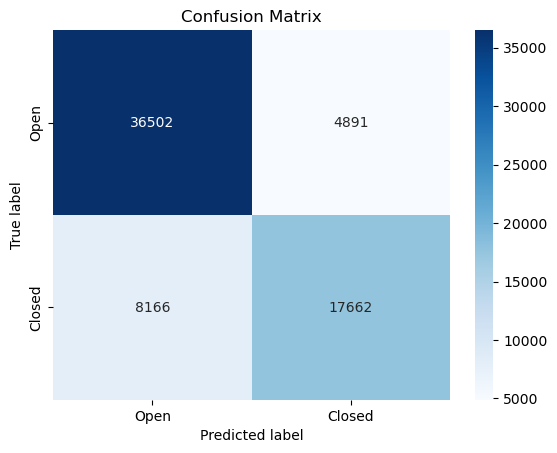

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_b_test, y_pred_binary)

# Define the labels
labels = ['Open', 'Closed']

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

### Code to run the training and testing of binary classifier for 30-folds 

In [22]:
from sklearn.model_selection import StratifiedKFold

# Define the input and output variables
X = questions_df[['Title', 'Body', 'Tags']]
y_binary = questions_df['Comment'].apply(lambda x: 0 if x == 0 else 1)

# Define the number of folds
n_splits = 30

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize an empty list to store the accuracy scores
acc_scores = []

# Loop over the folds
for train_index, test_index in skf.split(X, y_binary):
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_binary.iloc[train_index], y_binary.iloc[test_index]

    # Vectorize the input features
    vectorizer = TfidfVectorizer()
    X_train_vect = vectorizer.fit_transform(X_train.apply(lambda x: ' '.join(x), axis=1))
    X_test_vect = vectorizer.transform(X_test.apply(lambda x: ' '.join(x), axis=1))

    # Train the binary classifier
    clf_binary = LogisticRegression(max_iter=10000)
    clf_binary.fit(X_train_vect, y_train)

    # Evaluate the binary classifier on the test set for this fold
    y_pred_binary = clf_binary.predict(X_test_vect)
    acc_score = accuracy_score(y_test, y_pred_binary)
    acc_scores.append(acc_score)
    
# Calculate the mean accuracy score across all folds
mean_acc_score = sum(acc_scores) / n_splits
print(f"Mean binary classification accuracy: {mean_acc_score}")

Mean binary classification accuracy: 80.5000017


In [23]:
# Define the input and output variables
X = questions_df[['Title', 'Body', 'Tags']]
y_multiclass = questions_df['Comment']

# Split the data into training and test sets
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X, y_multiclass, test_size=0.2, random_state=42)

# Vectorize the input features
vectorizer = TfidfVectorizer()
X_m_train_vect = vectorizer.fit_transform(X_m_train.apply(lambda x: ' '.join(x), axis=1))
X_m_test_vect = vectorizer.transform(X_m_test.apply(lambda x: ' '.join(x), axis=1))

# Train the multiclass classifier
# Uncomment these models one-by-one to see their performance as training all of them together takes a lot of time
# Logistic Regression model
clf_multiclass = OneVsRestClassifier(LogisticRegression(max_iter=10000))

# Random Forest model
# clf_multiclass = RandomForestClassifier(n_estimators=100)

# SVC model
# clf_multiclass = OneVsRestClassifier(SVC(kernel='linear', C=10))

# clf_multiclass = KNeighborsClassifier(n_neighbors=5)

clf_multiclass.fit(X_m_train_vect, y_m_train)

# Evaluate the multiclass classifier
y_pred_multiclass = clf_multiclass.predict(X_m_test_vect)
acc_multiclass = accuracy_score(y_m_test, y_pred_multiclass)
print(f"Multiclass classification accuracy: {acc_multiclass}")
print(classification_report(y_m_test, y_pred_multiclass))

Multiclass classification accuracy: 0.7060888710373247
              precision    recall  f1-score   support

           0       0.76      0.94      0.84     41393
           2       0.57      0.42      0.49      7616
           3       0.53      0.25      0.34      3852
           4       0.51      0.29      0.37      8511
           5       0.53      0.29      0.38      5849

    accuracy                           0.71     67221
   macro avg       0.58      0.44      0.48     67221
weighted avg       0.67      0.71      0.67     67221



### Script to predict what will be the closing reason

In [24]:
# Define the input for the new instance
title = "How to write a Python function?"
body = "I am trying to write a Python function, but I am not sure where to start. Can someone help me?"
tags = "python function"

# Vectorize the input features
X_new = vectorizer.transform([f"{title} {body} {tags}"])

# Make the prediction
y_pred_new = clf_multiclass.predict(X_new)

# Map the predicted label to the corresponding reason
reasons = {0: "open", 2: "off-topic", 3: "unclear", 4: "too broad", 5: "opinion"}
predicted_reason = reasons[y_pred_new[0]]

# Print the predicted reason
print(f"This question is predicted to be closed because it is {predicted_reason}")


This question is predicted to be closed because it is too broad


### Confusion Matrix for Closing reason classifier

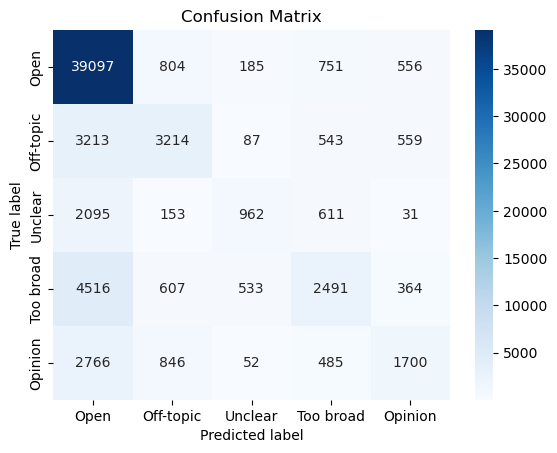

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get the confusion matrix
cm = confusion_matrix(y_m_test, y_pred_multiclass)

# Define the labels
labels = ['Open', 'Off-topic', 'Unclear', 'Too broad', 'Opinion']

# Plot the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels to the plot
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()